In [1]:
# All tickets for Sponsor 19
csv_path='/Users/gaba/Code/torproject/trac/datasets/S19_tickets.csv'

import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

csv_file = pd.read_csv(csv_path)

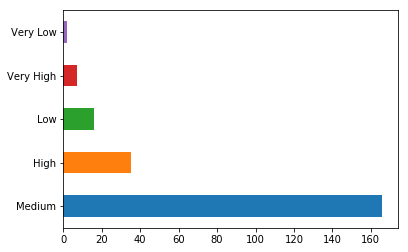

In [2]:
# how is the priority on tickets
csv_file['Priority'].value_counts().plot.barh()

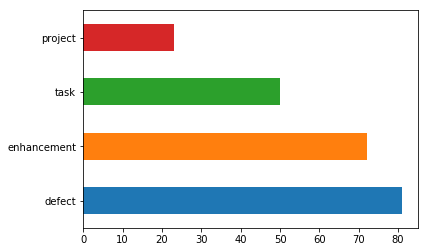

In [3]:
# which type of tickets
csv_file['Type'].value_counts().plot.barh()

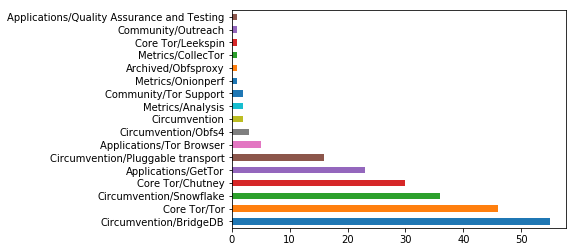

In [5]:

# which components we are changing
csv_file['Component'].value_counts().plot.barh()

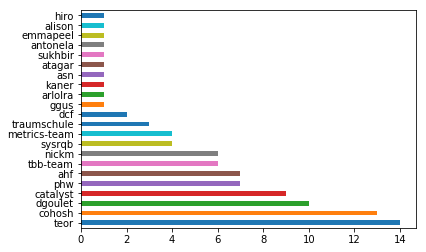

In [6]:
# who is assigned
csv_file['Owner'].value_counts().plot.barh()


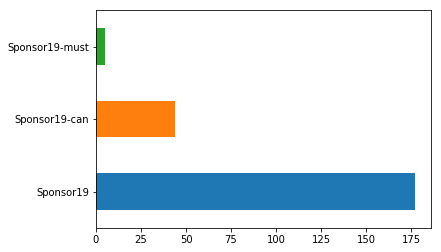

In [7]:
# how many must tickets versus 'can be done'
csv_file['Sponsor'].value_counts().plot.barh()

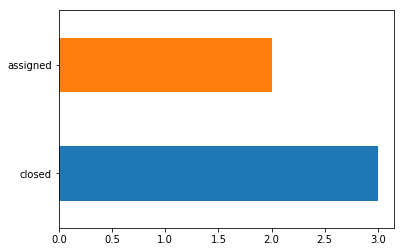

In [8]:
# how many sponsor19-must tickets are already done and how many still need to be finish
csv_file.query('Sponsor=="Sponsor19-must"')['Status'].value_counts().plot.barh()


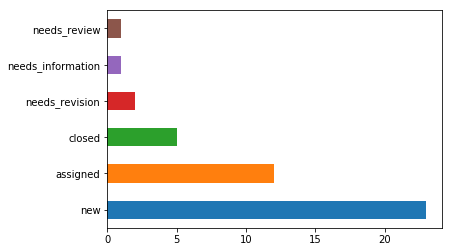

In [9]:
# what about the 'could be done' tickets
csv_file.query('Sponsor=="Sponsor19-can"')['Status'].value_counts().plot.barh()

In [10]:
# are all of the open tickets estimated?
csv_file[csv_file.Points.isnull()].query('Status!="closed"')

,id,Summary,Sponsor,Status,Owner,Type,Priority,Milestone,Component,Severity,Resolution,Actual Points,Parent ID,Points,Reviewer,Keywords
1,19001,Tor Browser with Snowflake,Sponsor19,new,NaN,project,Very High,NaN,Circumvention/Snowflake,Critical,NaN,NaN,NaN,NaN,NaN,NaN
3,28152,Gettor code refactor with Python Twisted,Sponsor19,needs_review,hiro,enhancement,Very High,NaN,Applications/GetTor,Major,NaN,NaN,#28232,NaN,phw,gettor-roadmap
5,29279,Test obfs4 reachability,Sponsor19,assigned,cohosh,task,Very High,NaN,Circumvention/Obfs4,Normal,NaN,NaN,NaN,NaN,NaN,"NGO, community, anti-censorship-roadmap"
7,5211,Discuss other ways for the bridge authority to...,Sponsor19,assigned,NaN,task,High,Tor: unspecified,Core Tor/Tor,Normal,NaN,NaN,NaN,NaN,NaN,tor-bridge reachability tor-bridgeauth needs-d...
9,10692,GetTor needs official two-factor-enabled dropb...,Sponsor19,reopened,NaN,defect,High,NaN,Applications/GetTor,Normal,NaN,NaN,#28231,NaN,NaN,gettor-roadmap
12,12089,BridgedDB can be forced to email arbitrary ema...,Sponsor19,assigned,NaN,defect,High,NaN,Circumvention/BridgeDB,Normal,NaN,NaN,NaN,NaN,NaN,"bridgedb-email, security"
16,14744,Automate upload of latest Tor Browser to cloud...,Sponsor19,assigned,NaN,defect,High,NaN,Applications/GetTor,Normal,NaN,NaN,#28231,NaN,NaN,gettor-roadmap
20,25483,Windows reproducible build of snowflake,Sponsor19,accepted,cohosh,project,High,NaN,Circumvention/Snowflake,Normal,NaN,NaN,#19001,NaN,NaN,TorBrowserTeam201805
22,27330,@get_tor on twitter not responding,Sponsor19,assigned,NaN,defect,High,NaN,Applications/GetTor,Normal,NaN,NaN,#28231,NaN,NaN,gettor-roadmap
23,27385,https://snowflake.torproject.org/embed is conf...,Sponsor19,new,NaN,defect,High,NaN,Circumvention/Snowflake,Major,NaN,NaN,NaN,NaN,NaN,"snowflake, ux-team"


In [11]:
# how many points still need to be done
points_to_go = csv_file.query('Status!="closed"').filter(['Points']).sum()

points_to_go

Points    225.9
dtype: float64

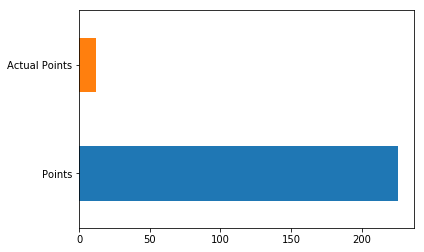

In [15]:
# How many days took to complete the ticket versus estimation (there may not be enough data on actual points for this)
csv_file.query('Status!="closed"').filter(['Points', 'Actual Points']).sum().plot.barh()